<h4>ChatGPT vs Bing Source Overlap</h4>
<p>
This notebook presents a comparative analysis of source overlap between ChatGPT and Bing.
The objective is to quantify the extent to which both systems cite or reference overlapping web sources when responding to the same queries.
</p>

In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df, get_bing_df
from metrics import syntactic_overlap
from plots import boxplot

<h4>Dataset: ChatGPT</h4>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,"[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,"[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,"[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,"[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,"[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,"[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,"[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,"[[ASUS TUF Gaming A14, ASUS Vivobook S14 OLED,..."
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,[There is no one-size-fits-all answer to “the ...,[[https://www.techradar.com/news/wearables/bes...,[[https://www.techadvisor.com/article/723389/b...,"[[Apple Watch Ultra 2, Apple Watch Series 10, ..."
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,[“Best” depends on what matters most to you (f...,[[https://www.techradar.com/news/wearables/bes...,"[[https://www.youtube.com/watch?v=3xgvATlp6fs,...","[[Apple Watch Ultra 2, Samsung Galaxy Watch 8,..."


<h4>Dataset: Bing</h4>

In [3]:
bing_df = get_bing_df()
bing_df

,query,product,market_type,query_level,content,url,domain,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[The Best Phones We've Tested for 2025 | PCMag...,"[https://www.pcmag.com/picks/the-best-phones, ...","[pcmag.com, tomsguide.com, techradar.com, zdne...","[[Apple iPhone 17, Samsung Galaxy S25 Ultra, S..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,[Top Smartphones Under $1000 About UsTrendingR...,[https://www.analyticsinsight.net/gadgets/best...,"[analyticsinsight.net, techwiser.com, techspec...","[[Samsung Galaxy S25, iPhone 16 Pro, Google Pi..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,[9 Best Camera Phones Under $1000 for Amazing ...,[https://www.techwisehub.com/blog/best-camera-...,"[techwisehub.com, techwiser.com, amateurphotog...","[[Samsung Galaxy S25, iPhone 16, Google Pixel ..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[Best Phones Under $1000 (August 2025) - TechW...,[https://techwiser.com/best-phones-under-1000-...,"[techwiser.com, pcmag.com, techspecs.info, ana...","[[Apple iPhone 16 Pro, Samsung Galaxy S25 Plus..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[The Best Laptops We've Tested (September 2025...,"[https://www.pcmag.com/picks/the-best-laptops,...","[pcmag.com, nytimes.com, tomsguide.com, zdnet....","[[Dell 14 Plus (DB14250), Dell Precision 5690,..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[10 Best Laptops 2025 Under $1500: Complete Gu...,[https://gadgetsandall.com/10-best-laptops-202...,"[gadgetsandall.com, gizmodo.com, dockuniverse....","[[Apple MacBook Air 13″ (M4), ASUS ROG Strix G..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, dockuniverse.com...",[[MSI Titan 18 HX Gaming Laptop (A14VIG-036US)...
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[10 Best Laptops Under $1500 for 2025: Perform...,[https://dockuniverse.com/best-laptops-for-150...,"[dockuniverse.com, pcmag.com, gizmodo.com, ofz...","[[MSI Titan 18 HX, ASUS Zenbook 14, MSI Titan ..."
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,[The Best Smartwatches We've Tested for 2025 |...,[https://www.pcmag.com/picks/the-best-smartwat...,"[pcmag.com, forbes.com, tomsguide.com, techrad...","[[Apple Watch Series 11, Samsung Galaxy Watch ..."
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,[Best budget smartwatches: 6 cheap but good op...,[https://www.wareable.com/smartwatches/best-ch...,"[wareable.com, tomsguide.com, pcmag.com, techr...","[[Amazfit Active 2, Huawei Watch Fit 3, Xiaomi..."


<h4>Cross-System Mean Source Overlap (MSO) - Implementation & Calculation</h4>
<p>This section defines a metric to quantify the alignment between ChatGPT’s cited sources and Bing’s retrieved web results for the same query. The metric averages, over ChatGPT runs, the syntactic overlap between each ChatGPT source list and Bing’s aggregated results.</p>
<ul>
  <li>ChatGPT source lists: $ S_{\text{GPT}, q} = [s_{q1}, s_{q2}, s_{q3}] $, where each $ s_{qi} $ is the list of sources cited by ChatGPT in run $ i $ for query $ q $.</li>
  <li>Bing results: $ S_{\text{Bing}, q} = [u_{q1}, \ldots, u_{q10}] $, where each $ u_{qi} $ is an individual organic search result returned by Bing for query $ q $.</li>
</ul>
<p>Formally, the Cross-System Mean Source Overlap for query $ q $ is</p>
<p>$$
CSMSO(q) = \frac{1}{|S_{\text{GPT}, q}|} \sum_{i=1}^{|S_{\text{GPT}, q}|} O_{\text{syntactic}}(s_{qi}, S_{\text{Bing}, q})
$$</p>
<p>Here, $ O_{\text{syntactic}}(s_{qi}, S_{\text{Bing}, q}) $ denotes the syntactic overlap between the ChatGPT source list $ s_{qi} $ and Bing’s aggregated set $ S_{\text{Bing}, q} $, computed with the Szymkiewicz–Simpson coefficient (overlap relative to the smaller list). Higher $ CSMSO(q) $ indicates greater alignment in referenced domains across systems for the same query.</p>

In [4]:
def calc_csmso(chatgpt_df, bing_df, chatgpt_sources):
    results = []
    
    for idx, row in chatgpt_df.iterrows():
        query = row.get("query")
        
        b = bing_df[bing_df["query"] == query]["url"].iloc[0]        
        g_lists = row[chatgpt_sources]
        pairwise_scores = [syntactic_overlap(g, b) for g in g_lists]
        
        results.append({
            "query": query,
            "product": row.get("product"),
            "market_type": row.get("market_type"),
            "query_level": row.get("query_level"),
            "csmso_mean": float(np.mean(pairwise_scores)),
            "csmso_std": float(np.std(pairwise_scores, ddof = 0)) if len(pairwise_scores) > 1 else 0.0,
        })
    
    return pd.DataFrame(results)

In [5]:
csmso_df = calc_csmso(chatgpt_df, bing_df, chatgpt_sources = "sources_cited")
csmso_df

,query,product,market_type,query_level,csmso_mean,csmso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,0.722222,0.207870
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.333333,0.471405
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.000000,0.000000
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.577778,0.125708
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.000000,0.000000
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.000000,0.000000
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.550000,0.147196
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,0.000000,0.000000


<h4>Mean Internal Source Overlap - Analysis (Sources Cited in Response)</h4>

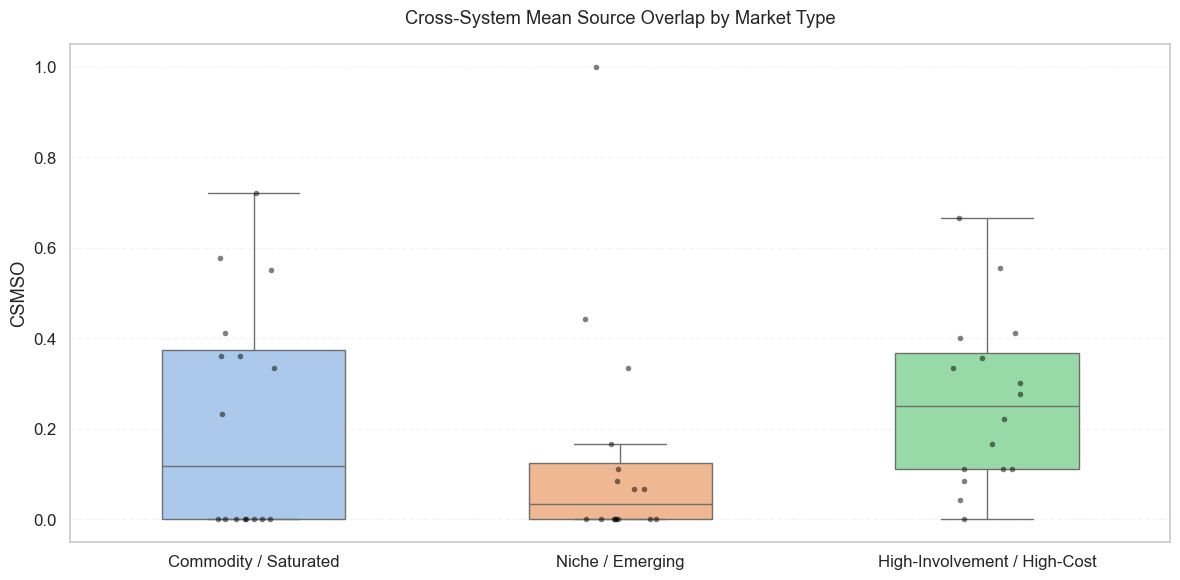

In [6]:
csmso_cs = csmso_df[csmso_df["market_type"] == "Commodity / Saturated"]
csmso_ne = csmso_df[csmso_df["market_type"] == "Niche / Emerging"]
csmso_hh = csmso_df[csmso_df["market_type"] == "High-Involvement / High-Cost"]

plot_df = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_cs["csmso_mean"],
        csmso_ne["csmso_mean"],
        csmso_hh["csmso_mean"],
    ], ignore_index=True),
    "Market Type": (
        ["Commodity / Saturated"] * len(csmso_cs)
        + ["Niche / Emerging"] * len(csmso_ne)
        + ["High-Involvement / High-Cost"] * len(csmso_hh)
    )
})

fig, ax = boxplot(
    df=plot_df,
    x_col="Market Type",
    y_col="CSMSO",
    order=["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title="Cross-System Mean Source Overlap by Market Type",
    xlabel="",
    ylabel="CSMSO"
)

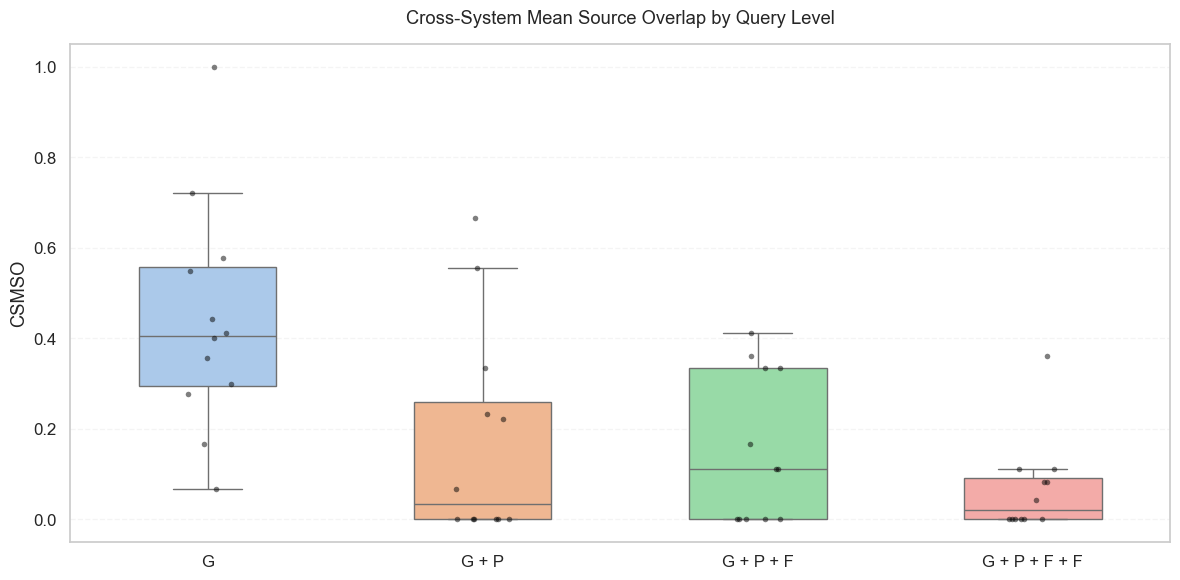

In [7]:
csmso_g = csmso_df[csmso_df["query_level"] == "General"]
csmso_gp = csmso_df[csmso_df["query_level"] == "General & Price"]
csmso_gpf = csmso_df[csmso_df["query_level"] == "General & Price & Feature"]
csmso_gpff = csmso_df[csmso_df["query_level"] == "General & Price & Feature & Feature"]

plot_df = pd.DataFrame({
    "CSMSO": pd.concat([
        csmso_g["csmso_mean"],
        csmso_gp["csmso_mean"],
        csmso_gpf["csmso_mean"],
        csmso_gpff["csmso_mean"]
    ], ignore_index=True),
    "Query Level": (
        ["G"] * len(csmso_g)
        + ["G + P"] * len(csmso_gp)
        + ["G + P + F"] * len(csmso_gpf)
        + ["G + P + F + F"] * len(csmso_gpff)
    )
})

fig, ax = boxplot(
    df=plot_df,
    x_col="Query Level",
    y_col="CSMSO",
    order=["G", "G + P", "G + P + F", "G + P + F + F"],
    title="Cross-System Mean Source Overlap by Query Level",
    xlabel="",
    ylabel="CSMSO"
)